In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-dataset/Employee.csv


In [2]:
df = pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.shape

(4653, 9)

In [5]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [9]:
# Yesrs worked in the Organization
df['YearsSinceJoin'] = 2024 - df['JoiningYear']

In [10]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,YearsSinceJoin
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,7
1,Bachelors,2013,Pune,1,28,Female,No,3,1,11
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,10
3,Masters,2016,Bangalore,3,27,Male,No,5,1,8
4,Masters,2017,Pune,3,24,Male,Yes,2,1,7


# Visualization

<Axes: >

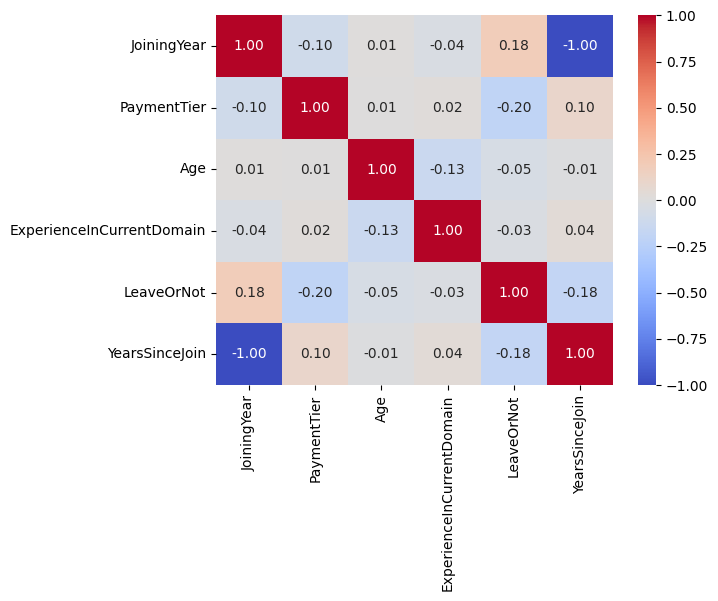

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt = '.2f', cmap = 'coolwarm')

No such correlation found

In [20]:
df_cat = df.select_dtypes(include= ['object'])
df_cat

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes
...,...,...,...,...
4648,Bachelors,Bangalore,Female,No
4649,Masters,Pune,Male,No
4650,Masters,New Delhi,Male,No
4651,Bachelors,Bangalore,Male,Yes


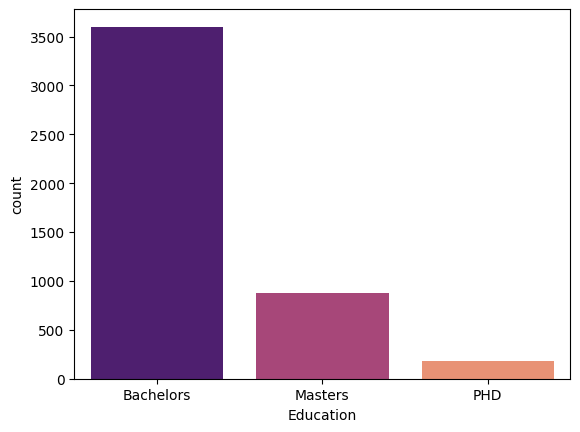

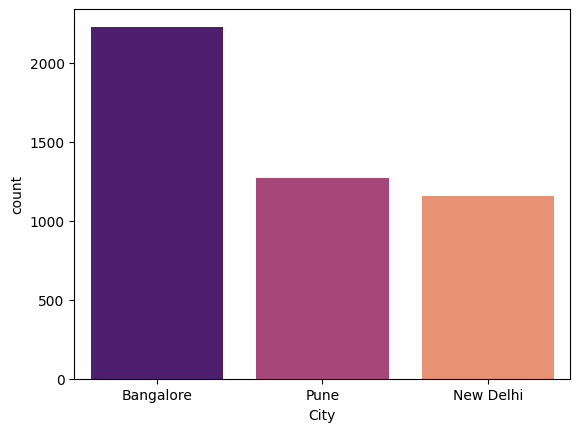

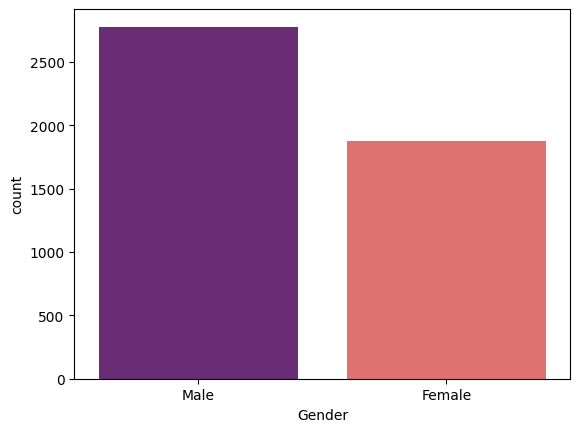

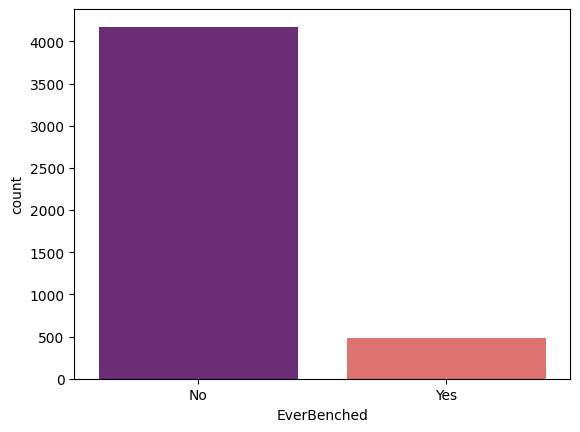

In [22]:
for col in df_cat:
    sns.countplot(x = col, data = df, palette = 'magma')
    plt.show()

In [26]:
df_num = ['Age','ExperienceInCurrentDomain','YearsSinceJoin']
df['PaymentTier']=df['PaymentTier'].astype('category')
df['LeaveOrNot']=df['LeaveOrNot'].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  4653 non-null   object  
 1   JoiningYear                4653 non-null   int64   
 2   City                       4653 non-null   object  
 3   PaymentTier                4653 non-null   category
 4   Age                        4653 non-null   int64   
 5   Gender                     4653 non-null   object  
 6   EverBenched                4653 non-null   object  
 7   ExperienceInCurrentDomain  4653 non-null   int64   
 8   LeaveOrNot                 4653 non-null   category
 9   YearsSinceJoin             4653 non-null   int64   
dtypes: category(2), int64(4), object(4)
memory usage: 300.3+ KB


# Data Preprocessing 

In [29]:
# since we have calculated the no of years since joining , we can drop the Joining year column
df.drop('JoiningYear',axis = 1, inplace = True)

In [30]:
df.head()

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,YearsSinceJoin
0,Bachelors,Bangalore,3,34,Male,No,0,0,7
1,Bachelors,Pune,1,28,Female,No,3,1,11
2,Bachelors,New Delhi,3,38,Female,No,2,0,10
3,Masters,Bangalore,3,27,Male,No,5,1,8
4,Masters,Pune,3,24,Male,Yes,2,1,7


In [33]:
x = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
x.columns

Index(['Education', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched',
       'ExperienceInCurrentDomain', 'YearsSinceJoin'],
      dtype='object')

In [37]:
categorical_columns = ['Education', 'City', 'PaymentTier','Gender','EverBenched']
x_train_encoded = pd.get_dummies(x_train, columns=categorical_columns,drop_first = True,dtype=int )
x_test_encoded = pd.get_dummies(x_test, columns=categorical_columns,drop_first = True ,dtype=int)


In [38]:
x_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3257 entries, 2005 to 860
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        3257 non-null   int64
 1   ExperienceInCurrentDomain  3257 non-null   int64
 2   YearsSinceJoin             3257 non-null   int64
 3   Education_Masters          3257 non-null   int64
 4   Education_PHD              3257 non-null   int64
 5   City_New Delhi             3257 non-null   int64
 6   City_Pune                  3257 non-null   int64
 7   PaymentTier_2              3257 non-null   int64
 8   PaymentTier_3              3257 non-null   int64
 9   Gender_Male                3257 non-null   int64
 10  EverBenched_Yes            3257 non-null   int64
dtypes: int64(11)
memory usage: 305.3 KB


In [39]:
x_train_encoded.head()

,Age,ExperienceInCurrentDomain,YearsSinceJoin,Education_Masters,Education_PHD,City_New Delhi,City_Pune,PaymentTier_2,PaymentTier_3,Gender_Male,EverBenched_Yes
2005,26,4,7,0,0,0,1,0,1,0,0
4316,23,1,10,0,0,1,0,0,1,1,0
1723,25,3,9,0,0,0,1,1,0,0,1
3773,40,5,10,1,0,1,0,0,1,1,0
2154,27,5,12,0,0,0,0,0,0,0,0


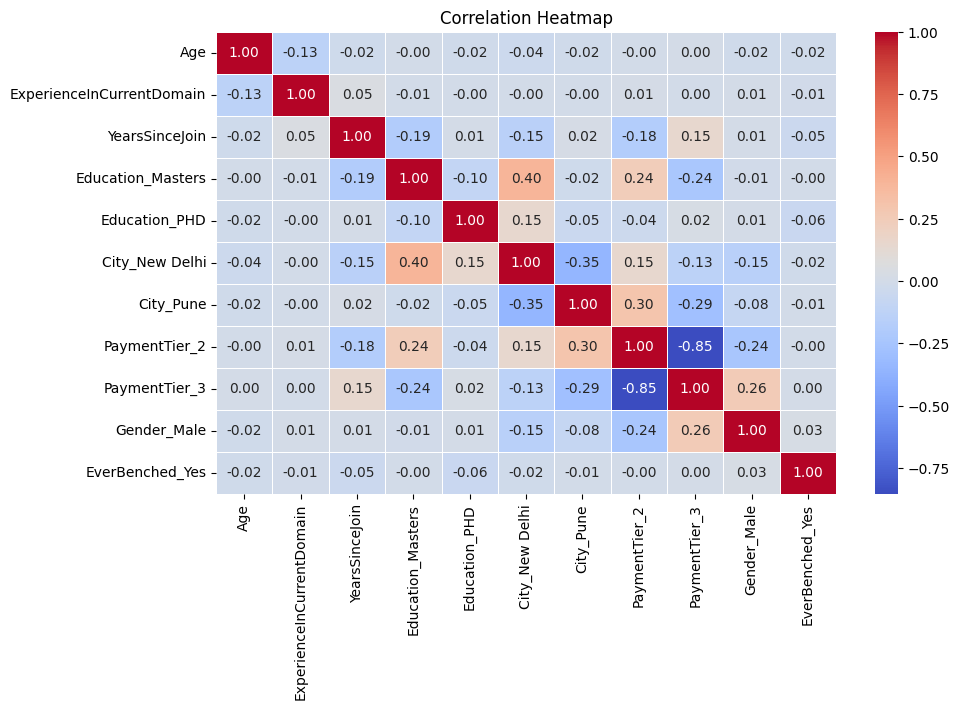

In [41]:
##-----------------------------------------------------------------------
##  2. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = x_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

# Building the Logistic Regression Model

In [43]:
##-------------------------
##  Build the logit model
##-------------------------
import statsmodels.api as sm
##  Constant is to be added when using the sm library
x_train_encoded = sm.add_constant( x_train_encoded )
#Call Logistic regression with X and Y variables of the training data
# Model is built with the training data
logit = sm.Logit(y_train, x_train_encoded)
##  Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.567336
         Iterations 5
                              Results: Logit
Model:                  Logit              Method:             MLE        
Dependent Variable:     LeaveOrNot         Pseudo R-squared:   0.120      
Date:                   2024-10-03 12:20   AIC:                3719.6260  
No. Observations:       3257               BIC:                3792.6888  
Df Model:               11                 Log-Likelihood:     -1847.8    
Df Residuals:           3245               LL-Null:            -2098.7    
Converged:              1.0000             LLR p-value:        1.3580e-100
No. Iterations:         5.0000             Scale:              1.0000     
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
const                      1

In [44]:
#Only significant X-vars are used to build the predictive model
#Only significant X-vars are used to build the predictive model
#Select the significant variables

significant_vars = logit_model.pvalues[logit_model.pvalues < 0.05].index.tolist()
print(significant_vars)


['const', 'Age', 'ExperienceInCurrentDomain', 'YearsSinceJoin', 'Education_Masters', 'City_New Delhi', 'City_Pune', 'PaymentTier_2', 'Gender_Male', 'EverBenched_Yes']


In [45]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
final_logit_model = sm.Logit( y_train,x_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.567462
         Iterations 5
                              Results: Logit
Model:                  Logit              Method:             MLE        
Dependent Variable:     LeaveOrNot         Pseudo R-squared:   0.119      
Date:                   2024-10-03 12:21   AIC:                3716.4483  
No. Observations:       3257               BIC:                3777.3340  
Df Model:               9                  Log-Likelihood:     -1848.2    
Df Residuals:           3247               LL-Null:            -2098.7    
Converged:              1.0000             LLR p-value:        3.6391e-102
No. Iterations:         5.0000             Scale:              1.0000     
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
const                      1

In [46]:
##----------------------------
##  Apply model on test data
##----------------------------
x_test_encoded=sm.add_constant(x_test_encoded)
#Make sure only the significant variables in the test data are selected
x_test_sig_vars=x_test_encoded[significant_vars]
x_test_sig_vars
y_prob=final_logit_model.predict(x_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [47]:
y_prob

297     0.443407
2705    0.289096
501     0.498682
1272    0.832266
3956    0.130409
          ...   
932     0.264093
439     0.713459
1313    0.335525
1849    0.783380
4641    0.433822
Length: 1396, dtype: float64

In [48]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})

In [49]:
y_pred_df

,actual_Y,predicted_prob
297,1,0.443407
2705,0,0.289096
501,1,0.498682
1272,0,0.832266
3956,0,0.130409
...,...,...
932,1,0.264093
439,1,0.713459
1313,0,0.335525
1849,1,0.783380


In [50]:
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
297         1        0.443407            0
2705        0        0.289096            0
501         1        0.498682            0
1272        0        0.832266            1
3956        0        0.130409            0


In [51]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[827  93]
 [263 213]]


In [57]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score, classification_report
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.45
Accuracy: 0.74


In [58]:
print(classification_report(y_pred_df['actual_Y'], y_pred_df['predicted_Y']))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       920
           1       0.70      0.45      0.54       476

    accuracy                           0.74      1396
   macro avg       0.73      0.67      0.68      1396
weighted avg       0.74      0.74      0.73      1396



sensitivity = 45% is not favourable

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).

    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """

    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)

        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()

        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)

    # Print the sensitivity table
    print(sensitivity_table)

In [54]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           0.997899
1        0.11           0.997899
2        0.12           0.991597
3        0.13           0.989496
4        0.14           0.983193
5        0.15           0.968487
6        0.16           0.945378
7        0.17           0.936975
8        0.18           0.922269
9        0.19           0.915966
10       0.20           0.909664
11       0.21           0.899160
12       0.22           0.890756
13       0.23           0.882353
14       0.24           0.869748
15       0.25           0.857143
16       0.26           0.846639
17       0.27           0.823529
18       0.28           0.800420
19       0.29           0.771008
20       0.30           0.756303
21       0.31           0.726891
22       0.32           0.699580
23       0.33           0.674370
24       0.34           0.668067
25       0.35           0.649160
26       0.36           0.640756
27       0.37           0.626050
28       0.38           0.619748
29       0

at 0.28 threshold we can achieve a 80% sensitivity

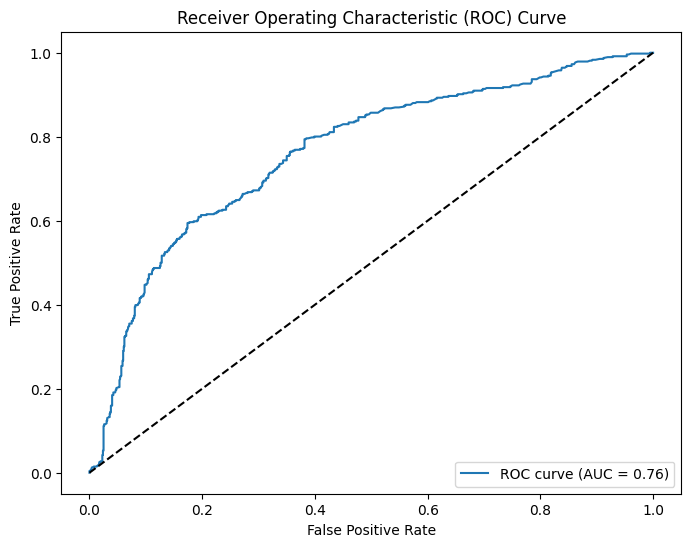

In [56]:
# prompt: print the roc curve for this

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

we should adjust the thresold/ cutoff to strike a balance between Sensitivity and Specificty, we should target to acheive both in 75% + range

In [63]:
y_pred_df['predicted_Y_0.28cutoff'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.28 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y  predicted_Y_0.28cutoff
297         1        0.443407            0                       1
2705        0        0.289096            0                       1
501         1        0.498682            0                       1
1272        0        0.832266            1                       1
3956        0        0.130409            0                       0


In [64]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y_0.28cutoff'])
print(cm)

[[546 374]
 [ 95 381]]


In [65]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score, classification_report
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y_0.28cutoff'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y_0.28cutoff'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.80
Accuracy: 0.66


We have compromised a little on accuracy but improved the sensitivity